In [2]:
import pandas as pd

data = pd.read_csv("cleaned_superstore_data.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


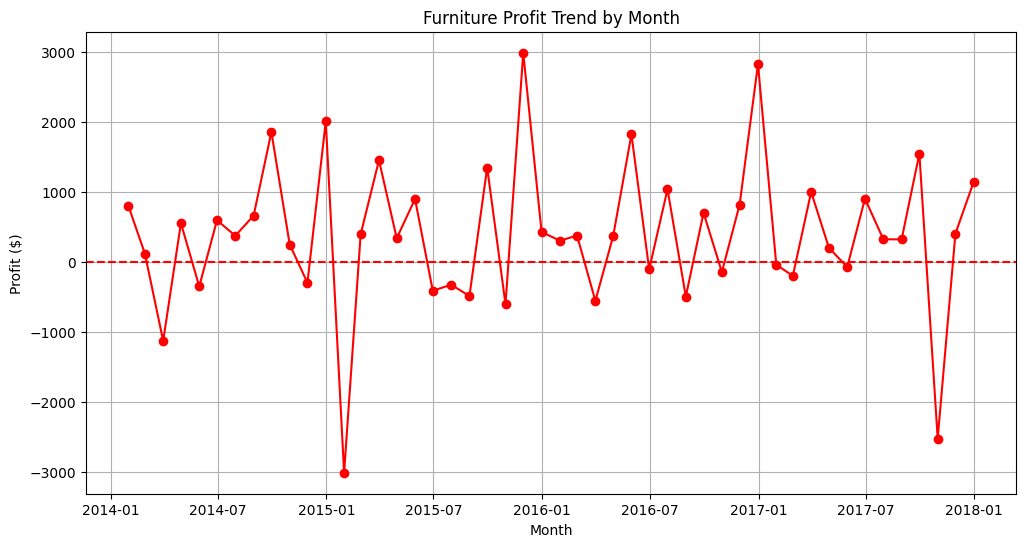

In [28]:
import matplotlib.pyplot as plt

furniture = data[data['Category'] == 'Furniture']

monthly_profit = furniture.groupby(pd.Grouper(key='Order Date', freq='ME'))['Profit'].sum().reset_index()
quarterly_profit = furniture.groupby(pd.Grouper(key='Order Date', freq='QE'))['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_profit['Order Date'], monthly_profit['Profit'], marker='o', color='red')
plt.axhline(0, color='red', linestyle='--', label='Break-Even')
plt.title('Furniture Profit Trend by Month')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.grid()

([<matplotlib.axis.XTick at 0x2be8a165950>,
 [Text(0, 0, 'Q1'), Text(1, 0, 'Q2'), Text(2, 0, 'Q3'), Text(3, 0, 'Q4')])

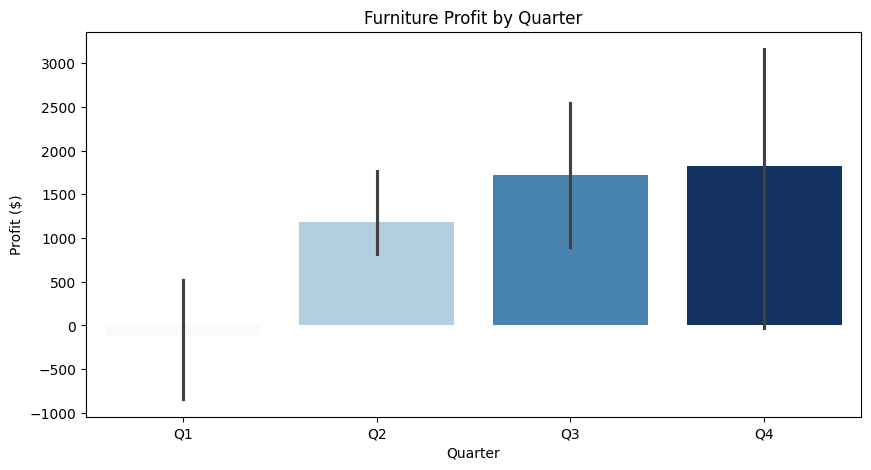

In [27]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=quarterly_profit['Order Date'].dt.quarter, y=quarterly_profit['Profit'], hue=quarterly_profit['Order Date'].dt.quarter, palette='Blues', legend=False)
plt.title('Furniture Profit by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Profit ($)')
plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'])

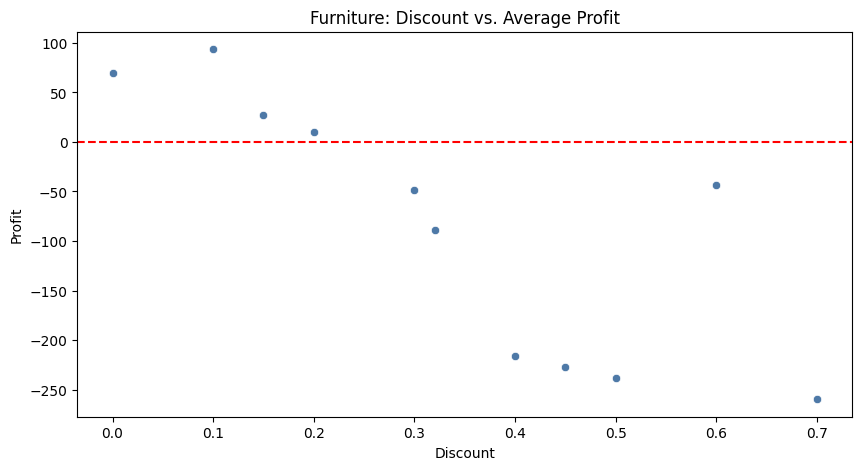

In [26]:
discount_profit = furniture.groupby('Discount')['Profit'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=discount_profit, x='Discount', y='Profit', color='#4E79A7')
plt.title('Furniture: Discount vs. Average Profit')
plt.axhline(0, color='red', linestyle='--')